Make the figure for the reference paper

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import apollinaire as apn
from apollinaire.peakbagging import *

In [2]:
plt.rcParams['lines.linewidth'] = 2
capsize = 5

In [3]:
def make_cube (outDir) :
    '''
    Read pkb files in a directory 
    and create a summary cube of them.
    '''
    list_results = glob.glob (path.join (outDir, '*.pkb'))
    x = np.arange (1, len (list_results)+1)
    cube = np.zeros ((len (list_results), 2, 20))
    for ii, f in enumerate (list_results) :
        result = np.loadtxt (f)
        cube[ii,:,:] = result
        
    return x, cube

In [4]:
profile = 'monte_carlo_2'
outDir1 = profile + '_' + str (365) + 'days'
outDir2 = profile + '_' + str (1460) + 'days'
x1, cube1 = make_cube (outDir1)
x2, cube2 = make_cube (outDir2)

In [5]:
a2z_file = profile + '.a2z'
a2z = read_a2z (a2z_file)
pkb = sort_pkb (a2z_to_pkb (a2z))

In [6]:
f1, f2 = pkb[0,2], pkb[1,2]

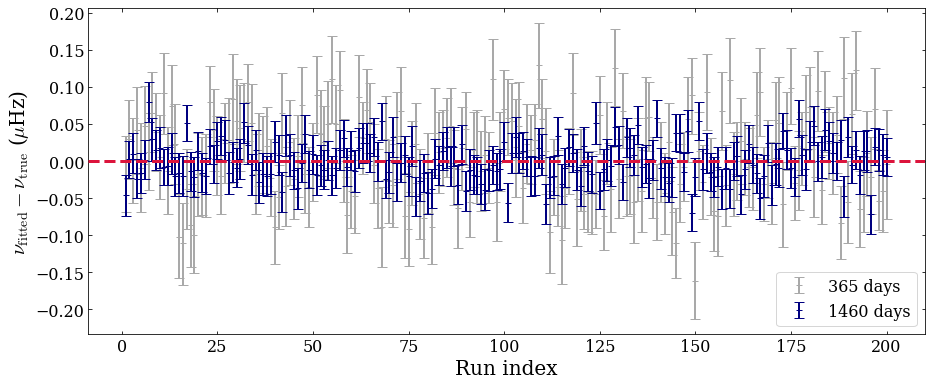

In [7]:
fig, ax = plt.subplots (1, 1, figsize=(15, 6))
ax.axhline (0, color='crimson', ls='--', zorder=20, lw=3)
ax.errorbar (x1, cube1[:,1,2]-f2, yerr=(cube1[:,1,3], cube1[:,1,4]), 
             capsize=capsize, color='darkgray', fmt='_', label='365 days')
ax.errorbar (x2, cube2[:,1,2]-f2, yerr=(cube2[:,1,3], cube2[:,1,4]), 
             capsize=capsize, color='navy', fmt='_', label='1460 days', zorder=10)
ax.set_ylabel (r'$\nu_\mathrm{fitted} - \nu_\mathrm{true}$ ($\mu$Hz)', fontsize=20)
ax.set_xlabel (r'Run index', fontsize=20)
ax.legend ()
plt.savefig ('figures/frequency_error.pdf')

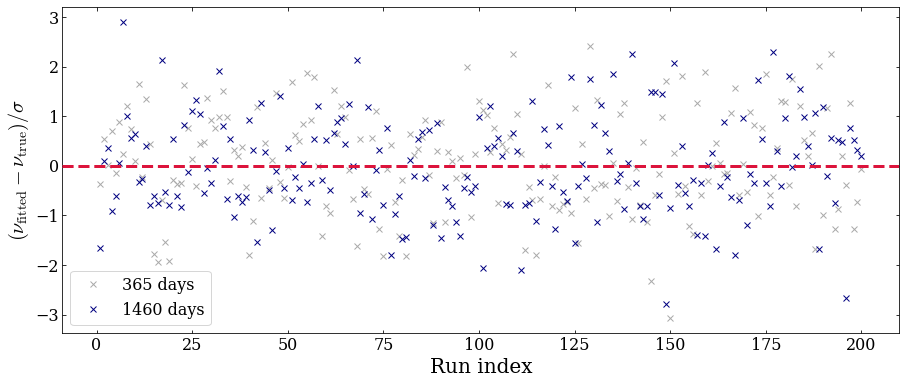

In [8]:
fig, ax = plt.subplots (1, 1, figsize=(15, 6))
ax.axhline (0, color='crimson', ls='--', zorder=20, lw=3)
ax.errorbar (x1, (cube1[:,1,2]-f2) / np.maximum (cube1[:,1,3], cube1[:,1,4]), 
             capsize=capsize, color='darkgray', fmt='x', label='365 days')
ax.errorbar (x2, (cube2[:,1,2]-f2) / np.maximum(cube2[:,1,3], cube2[:,1,4]), 
             capsize=capsize, color='navy', fmt='x', label='1460 days', zorder=10)
ax.set_ylabel (r'$(\nu_\mathrm{fitted} - \nu_\mathrm{true}) / \sigma$', fontsize=20)
ax.set_xlabel (r'Run index', fontsize=20)
ax.legend ()
plt.savefig ('figures/frequency_error_normalised.pdf')

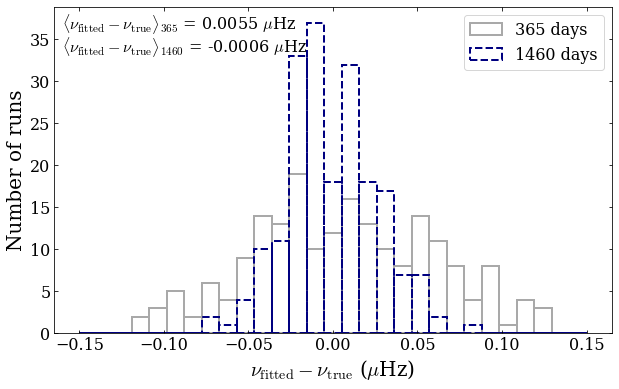

In [9]:
fig, ax = plt.subplots (1, 1, figsize=(10, 6))
bins = np.linspace (-0.15, 0.15, 30)
ax.hist (cube1[:,1,2]-f2, bins=bins, facecolor='None', edgecolor='darkgray', 
         lw=2, label='365 days')
ax.hist (cube2[:,1,2]-f2, bins=bins, facecolor='None', edgecolor='navy', 
         alpha=1, ls='--', lw=2, label='1460 days')
ax.text (0.015, 0.93, 
         r'$\langle \nu_\mathrm{{fitted}} - \nu_\mathrm{{true}} \rangle_\mathrm{{365}}$ = {:.4f} $\mu$Hz'.format (np.mean (cube1[:,1,2]-f2)), 
         transform=ax.transAxes)
ax.text (0.015, 0.86, 
         r'$\langle \nu_\mathrm{{fitted}} - \nu_\mathrm{{true}} \rangle_\mathrm{{1460}}$ = {:.4f} $\mu$Hz'.format (np.mean (cube2[:,1,2]-f2)), 
         transform=ax.transAxes)
ax.legend ()
ax.set_xlabel (r'$\nu_\mathrm{fitted} - \nu_\mathrm{true}$ ($\mu$Hz)', fontsize=20)
ax.set_ylabel (r'Number of runs', fontsize=20)
plt.savefig ('figures/frequency_hist_old.pdf')

1.0243048726306379 0.9907861554245296


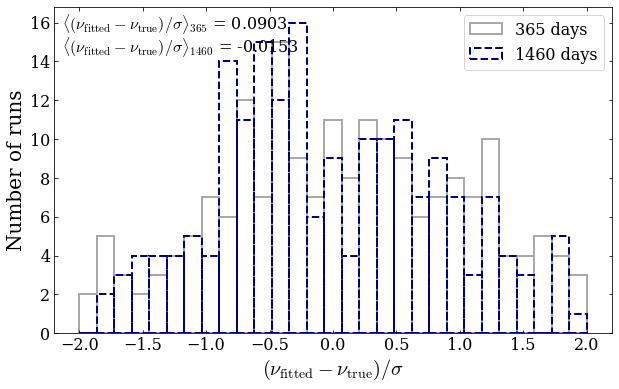

In [10]:
fig, ax = plt.subplots (1, 1, figsize=(10, 6))
bins = np.linspace (-2, 2, 30)
ax.hist ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]), bins=bins, facecolor='None', edgecolor='darkgray', 
         lw=2, label='365 days')
ax.hist ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]), bins=bins, facecolor='None', edgecolor='navy', 
         alpha=1, ls='--', lw=2, label='1460 days')
m1 = np.mean ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]))
m2 = np.mean ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]))
s1 = np.std ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]))
s2 = np.std ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]))
ax.text (0.015, 0.93, 
         r'$\langle (\nu_\mathrm{{fitted}} - \nu_\mathrm{{true}})/\sigma \rangle_\mathrm{{365}}$ = {:.4f}'.format (m1), 
         transform=ax.transAxes)
ax.text (0.015, 0.86, 
         r'$\langle (\nu_\mathrm{{fitted}} - \nu_\mathrm{{true}})/\sigma \rangle_\mathrm{{1460}}$ = {:.4f}'.format (m2), 
         transform=ax.transAxes)
ax.legend ()
ax.set_xlabel (r'$(\nu_\mathrm{fitted} - \nu_\mathrm{true})/\sigma$', fontsize=20)
ax.set_ylabel (r'Number of runs', fontsize=20)
plt.savefig ('figures/frequency_hist_normalised.pdf')
print (s1, s2)

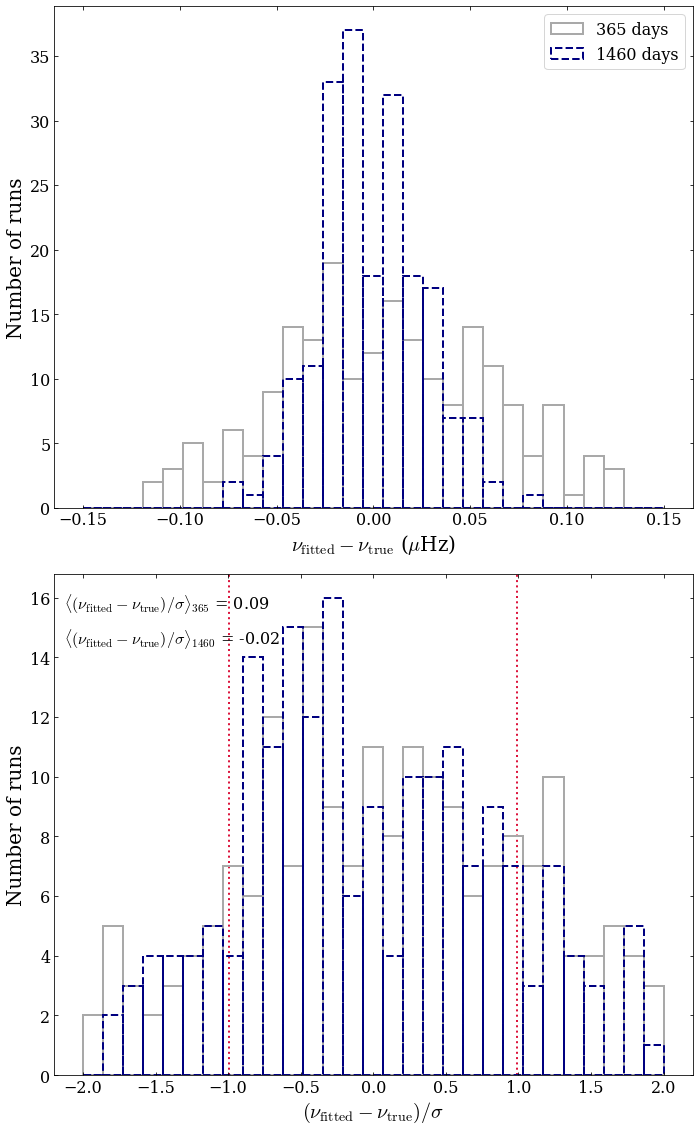

In [11]:
fig, (ax1, ax2) = plt.subplots (2, 1, figsize=(10, 16))

bins = np.linspace (-0.15, 0.15, 30)
ax1.hist (cube1[:,1,2]-f2, bins=bins, facecolor='None', edgecolor='darkgray', 
         lw=2, label='365 days')
ax1.hist (cube2[:,1,2]-f2, bins=bins, facecolor='None', edgecolor='navy', 
         alpha=1, ls='--', lw=2, label='1460 days')
#ax1.text (0.015, 0.93, 
#         r'$\langle \nu_\mathrm{{fitted}} - \nu_\mathrm{{true}} \rangle_\mathrm{{365}}$ = {:.4f} $\mu$Hz'.format (np.mean (cube1[:,1,2]-f2)), 
#         transform=ax1.transAxes)
#ax1.text (0.015, 0.86, 
#         r'$\langle \nu_\mathrm{{fitted}} - \nu_\mathrm{{true}} \rangle_\mathrm{{1460}}$ = {:.4f} $\mu$Hz'.format (np.mean (cube2[:,1,2]-f2)), 
#         transform=ax1.transAxes)
ax1.legend ()
ax1.set_xlabel (r'$\nu_\mathrm{fitted} - \nu_\mathrm{true}$ ($\mu$Hz)', fontsize=20)
ax1.set_ylabel (r'Number of runs', fontsize=20)

bins = np.linspace (-2, 2, 30)
ax2.hist ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]), bins=bins, facecolor='None', edgecolor='darkgray', 
         lw=2, label='365 days')
ax2.hist ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]), bins=bins, facecolor='None', edgecolor='navy', 
         alpha=1, ls='--', lw=2, label='1460 days')
m1 = np.mean ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]))
m2 = np.mean ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]))
s1 = np.std ((cube1[:,1,2]-f2)/np.maximum (cube1[:,1,3], cube1[:,1,4]))
s2 = np.std ((cube2[:,1,2]-f2)/np.maximum (cube2[:,1,3], cube2[:,1,4]))
ax2.text (0.015, 0.93, 
         r'$\langle (\nu_\mathrm{{fitted}} - \nu_\mathrm{{true}})/\sigma \rangle_\mathrm{{365}}$ = {:.2f}'.format (m1), 
         transform=ax2.transAxes)
ax2.text (0.015, 0.86, 
         r'$\langle (\nu_\mathrm{{fitted}} - \nu_\mathrm{{true}})/\sigma \rangle_\mathrm{{1460}}$ = {:.2f}'.format (m2), 
         transform=ax2.transAxes)
ax2.axvline (-s2, zorder=-30, ls=':', color='crimson')
ax2.axvline (s2, zorder=-30, ls=':', color='crimson')
#ax2.legend ()
ax2.set_xlabel (r'$(\nu_\mathrm{fitted} - \nu_\mathrm{true})/\sigma$', fontsize=20)
ax2.set_ylabel (r'Number of runs', fontsize=20)
fig.tight_layout ()
plt.savefig ('figures/frequency_hist.pdf')